In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Accuracy of Different Forecast Periods

# Define the base directory path where the Excel files are located
directory_path = '../../data/accuracy_results/'

# Define the subdirectories for different models
models = ['BASELINE', 'GRU', 'LSTM', 'SARIMA', 'TBATS']

# Updated data locations with multiple ranges for NRMSE and NMAE
data_locations = {
    '14 Days forecast': {'NRMSE': [(3, 'B:K'), (3, 'R:AA'), (3, 'AH:AQ')], 'NMAE': [(4, 'B:K'), (4, 'R:AA'), (4, 'AH:AQ')]},
    '7 Days forecast': {'NRMSE': [(8, 'B:K'), (8, 'R:AA'), (8, 'AH:AQ')], 'NMAE': [(9, 'B:K'), (9, 'R:AA'), (9, 'AH:AQ')]},
    '3 Days forecast': {'NRMSE': [(13, 'B:K'), (13, 'R:AA'), (13, 'AH:AQ')], 'NMAE': [(14, 'B:K'), (14, 'R:AA'), (14, 'AH:AQ')]},
    '1 Day forecast': {'NRMSE': [(18, 'B:K'), (18, 'R:AA'), (18, 'AH:AQ')], 'NMAE': [(19, 'B:K'), (19, 'R:AA'), (19, 'AH:AQ')]}
}

# Initialize a list to hold the combined NRMSE and NMAE data
combined_data = []

# Iterate over each model directory
for model in models:
    # Construct the full path to the model directory
    model_path = os.path.join(directory_path, model)
    
    # List all Excel files in the directory
    excel_files = [f for f in os.listdir(model_path) if f.endswith('.xlsx')]
    
    # Iterate over each Excel file
    for file in excel_files:
        # Construct the full file path
        file_path = os.path.join(model_path, file)
        
        # Iterate over each forecast category to extract NRMSE and NMAE data
        for forecast_period, metrics in data_locations.items():
            for metric, ranges in metrics.items():
                for row, columns in ranges:
                    try:
                        # Load the Excel file data for the specified range
                        df = pd.read_excel(file_path, usecols=columns, skiprows=row, nrows=1, header=None)
                        # Flatten the data and add it to the combined data list
                        values = df.values.flatten().tolist()
                        combined_data.extend([(forecast_period, metric, value) for value in values])
                    except Exception as e:
                        print(f"Error reading {file_path} for forecast period {forecast_period}, metric {metric}, range {columns}: {e}")

# Convert the combined data list to a DataFrame for plotting
combined_df = pd.DataFrame(combined_data, columns=['Forecast Period', 'Metric', 'Magnitude'])

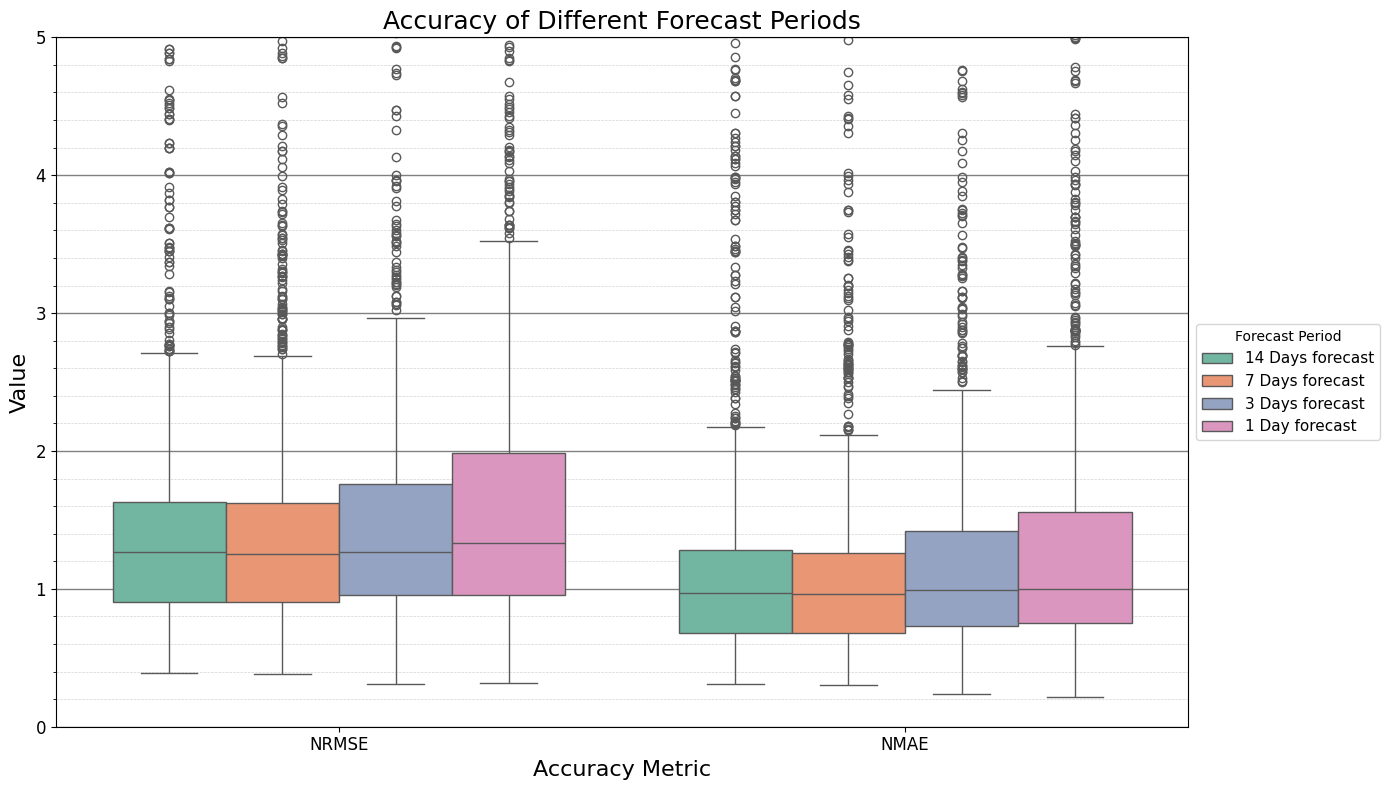

In [3]:
# Creating the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))
fig.set_facecolor('white')

# Plotting the boxplot
sns.boxplot(data=combined_df, x='Metric', y='Magnitude', hue='Forecast Period', palette='Set2')

# Setting up y-axis scale
ax.set_ylim(0, 5)

# Enabling minor ticks
ax.minorticks_on()

# Setting up grid lines
ax.yaxis.grid(True, which='major', color='grey', linestyle='-', linewidth=1)
ax.yaxis.grid(True, which='minor', color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Setting up x-axis and y-axis labels
ax.set_xlabel('Accuracy Metric', fontsize=16)
ax.set_ylabel('Value', fontsize=16)

# Setting the x-tick labels horizontally and ensuring they match the unique metric names
ax.set_xticks(range(len(combined_df['Metric'].unique())))
ax.set_xticklabels(combined_df['Metric'].unique(), rotation=0, fontsize=12)

# Disable minor x-ticks
ax.xaxis.set_tick_params(which='minor', bottom=False)

# Creating the box plot
plt.title("Accuracy of Different Forecast Periods", fontsize=18)
plt.legend(title='Forecast Period', bbox_to_anchor=(1, 0.5), loc='center left', fontsize=11)
plt.tight_layout()

# Check if the target directory exists
target_dir = '../../visualisations/forecast_periods_accuracy'
if not os.path.isdir(target_dir):
    os.makedirs(target_dir)

# save the plot
plot_path = '../../visualisations/forecast_periods_accuracy/forecast_periods_accuracy.png'
plt.savefig(plot_path)

# Display the plot
plt.show()